In [207]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import matplotlib.dates as dates

%matplotlib inline

In [154]:
logins_df = pd.read_json("logins.json")

In [155]:
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [156]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [157]:
logins_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [158]:
type(logins_df.login_time)

pandas.core.series.Series

In [159]:
logins_df.sort_values(by='login_time',inplace=True)

In [160]:
logins_df.head(10)

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
5,1970-01-01 20:21:41
10,1970-01-01 20:26:05
4,1970-01-01 20:26:21
11,1970-01-01 20:31:03
12,1970-01-01 20:34:46


In [161]:
ts_df = logins_df.copy()

In [162]:
ts_df.set_index('login_time',inplace=True)

In [163]:
ts_df["counts"] = 0

In [164]:
ts_df = ts_df.resample('15T').count()

In [167]:
ts_df.head()

,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


<div class="alert alert-success">
</div>
We have the times series with the 15 mins interval with us and the respective counts. Now we can analyze this time series and find out patterns if any.

Basically, we are interested to find:
1. If there is any overall trend. That is, the login counts increase or decrease overall.
2. If there is any seasonal trend. That is do the counts go up and down in some regular fashion like each week,day, month etc.
3. Are there any outliers? Something out of the regular.
4. Is there any long run cycle?



In [218]:
# plot the given data
def plot_ts(df,xlabel,ylabel):
    fig, ax = plt.subplots(figsize=(30,10))
    plt.plot(df.index,df.iloc[:,0])
    plt.hlines(y=np.mean(df.iloc[:,0]),xmin=df.index.min(),xmax=df.index.max(),colors=['red'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
    ax.xaxis.grid(True, which="minor")
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
    #plt.xticks(rotation=45)

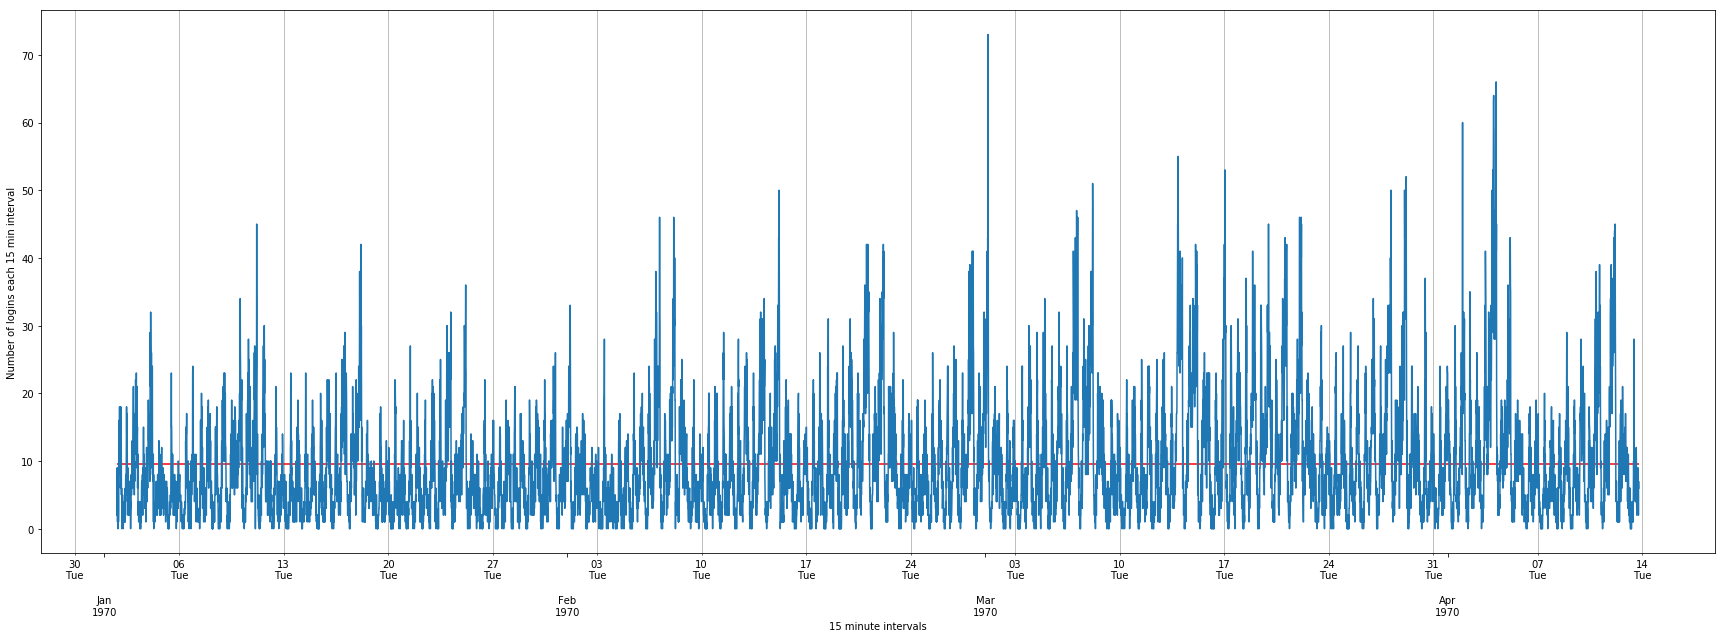

In [219]:
plot_ts(ts_df,"15 minute intervals","Number of logins each 15 min interval")

<div class="alert alert-success">
</div>
Some observations:
1. There is no obvious trend.
2. There appears to be some seasonality. We can investigate that further.
3. There might be one or two outliers but not very obvious or significant.
4. We see extreme values on one side of the mean line.

In [197]:
# let us plot hourly summed up data
ts_df["hour"] = [item.astype('M8[h]') for item in ts_df.index.values]

In [183]:
ts_df.head()

,counts,hour
login_time,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:00:00
1970-01-01 20:30:00,9,1970-01-01 20:00:00
1970-01-01 20:45:00,7,1970-01-01 20:00:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00


In [185]:
hour_df = ts_df.groupby(by="hour").sum()

In [187]:
hour_df.head()

,counts
hour,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


<function matplotlib.pyplot.xticks>

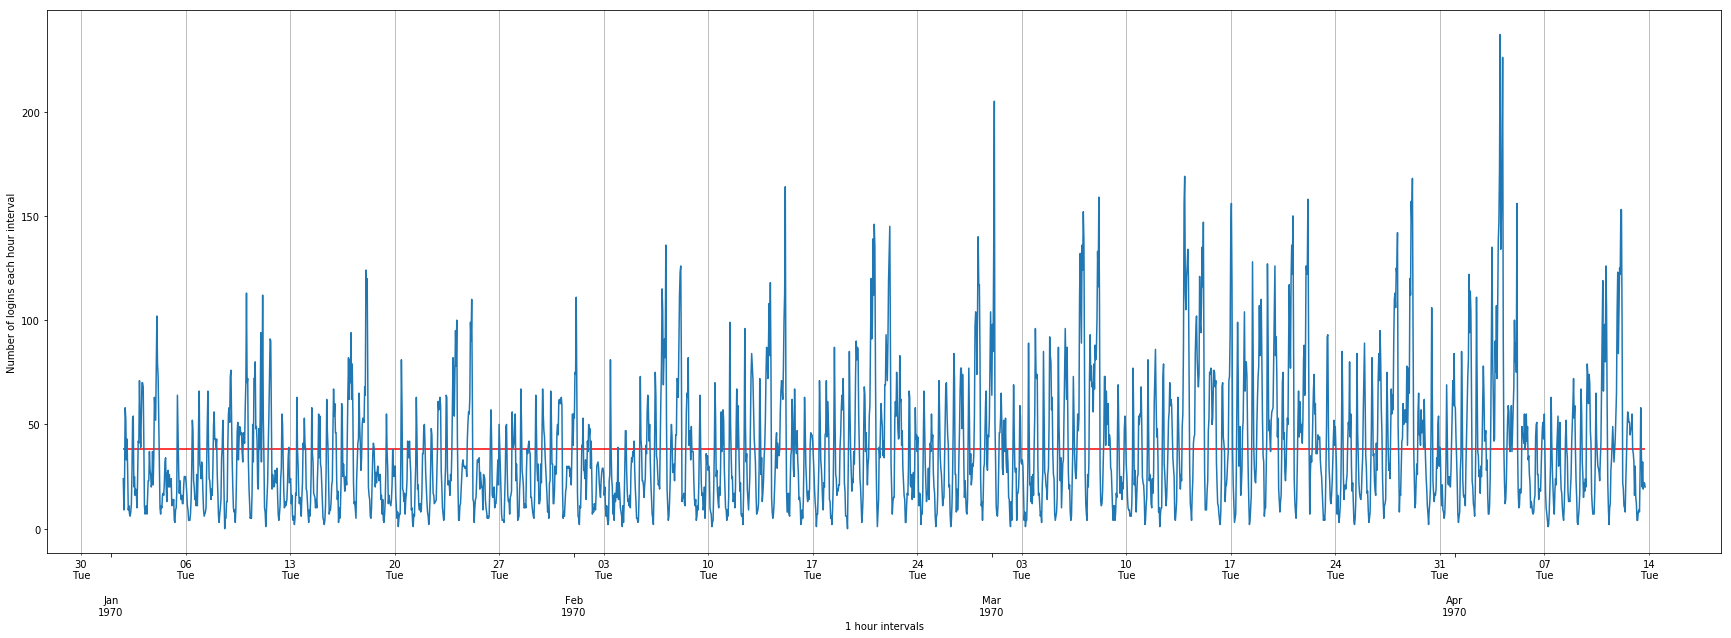

In [220]:
plot_ts(hour_df,"1 hour intervals","Number of logins each hour interval")
plt.xticks

In [199]:
# this chart is not very different from 15 min interval one
# let us now do daily chart
ts_df["day"] = [item.astype('M8[D]') for item in ts_df.index.values]
day_df = ts_df.groupby(by="day").sum()
day_df.head()

,counts
day,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


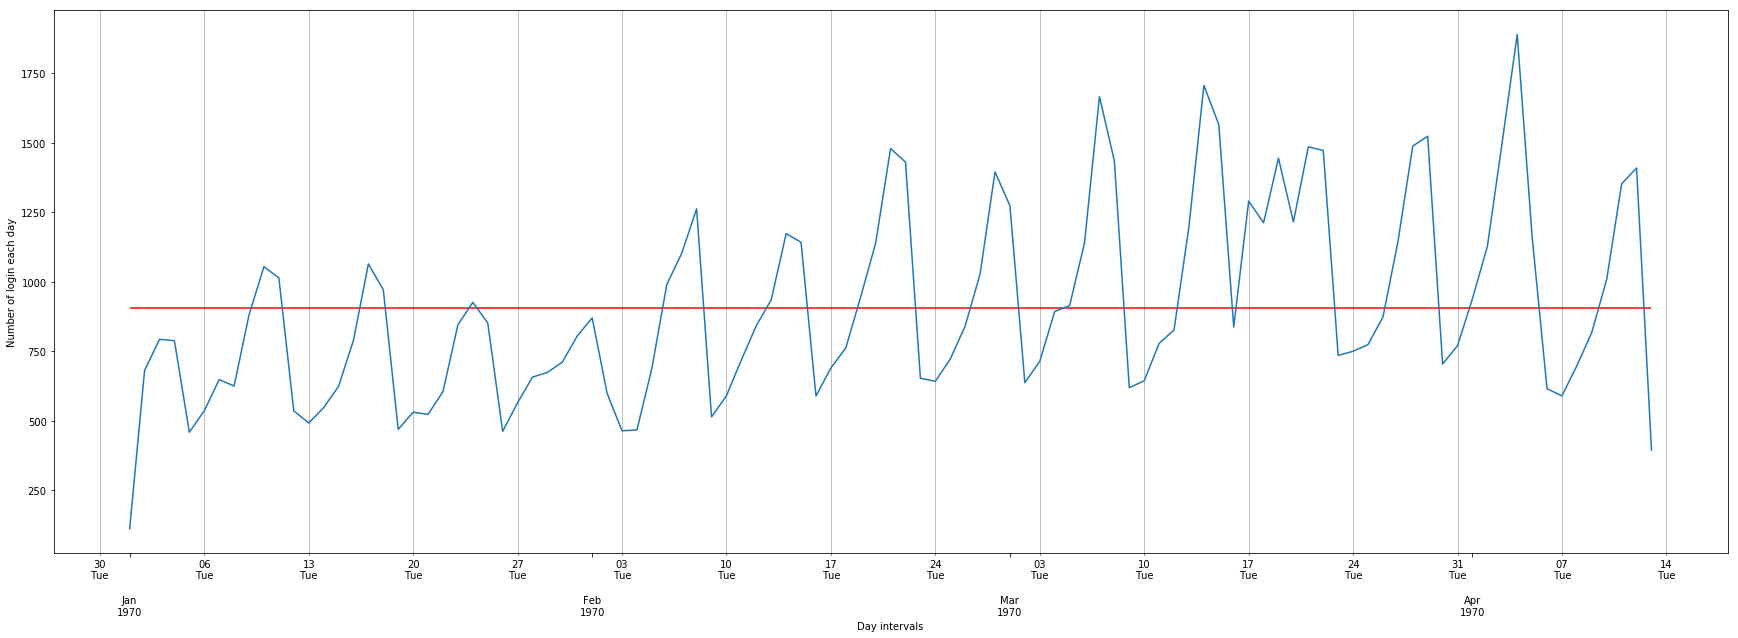

In [221]:
plot_ts(day_df,"Day intervals","Number of login each day")

- Here we clearly see weekly pattern. The number of logins drop around Monday/Tuesday and reaches at peak on Friday/Saturday.
- Also we see slight overall trend. The login counts are below mean in the left half but goes above mean in the right half of the overall time period. So we see a slight upward trend in daily logins.

In [227]:
# this chart is not very different from 15 min interval one
# let us now do daily chart
ts_df["week"] = [item.astype('M8[W]') for item in ts_df.index.values]
week_df = ts_df.groupby(by="week").sum()
week_df.head()

,counts
week,
1970-01-01,4017
1970-01-08,5149
1970-01-15,4971
1970-01-22,4912
1970-01-29,4590


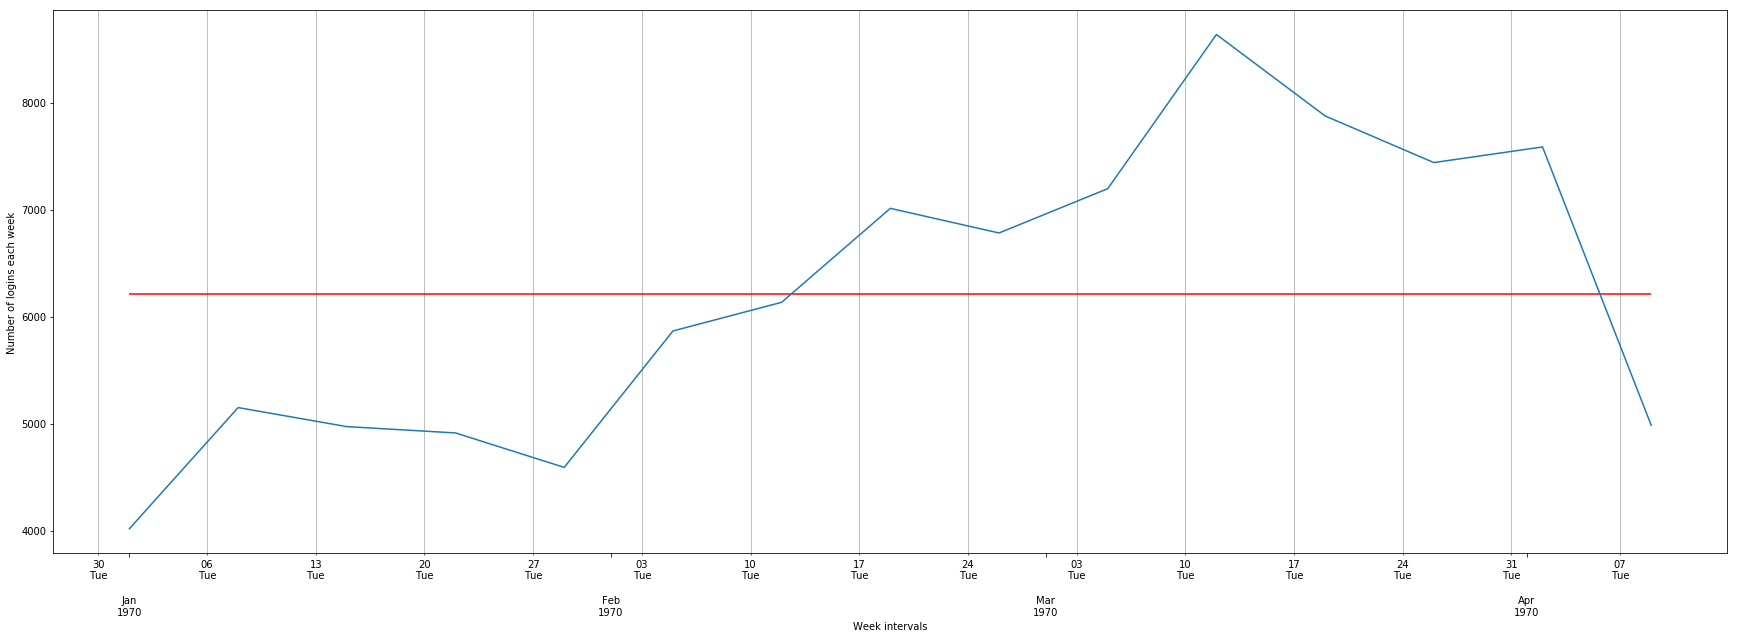

In [228]:
plot_ts(week_df,"Week intervals","Number of logins each week")

<div class="alert alert-success"></div>
### Conclusion:
- There is overall trend going up for the number of logins per day. But there is also sudden reversal in trend or it might be some outlier. We can't be sure as we don't have enough data to conlude that.

- There is weekly pattern. The number of logins go down around Mondays and touch the peak around Fridays.